## Task # 15:
- This is Task # 15 overall, But Task # 5 of Week 6
## Task # 05:

In [25]:
#importing regularly used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#importing the data set
fp = 'adult.csv'
adult_df = pd.read_csv(fp)

#this dataset has some missing values denoted by ?
adult_df.replace('?', np.nan, inplace=True)

#check for columns with null values

print(adult_df.columns[adult_df.isnull().any()])

#a look at the dataset
adult_df.head(3)

Index(['workclass', 'occupation', 'native-country'], dtype='object')


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


#### Preprocessing

In [3]:
# all the columns which have null values are categorical columns so we will use Mode to replace NULL values
# Columns with null values
columns_with_null = ['workclass', 'occupation', 'native-country']

# Fill missing embarked with the most frequent value (mode)
for c in columns_with_null:
    adult_df[c] = adult_df[c].fillna(adult_df[c].mode()[0])

In [4]:
print(adult_df.columns[adult_df.isnull().any()])

Index([], dtype='object')


In [5]:
# a look at the information of dataset
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


##### Making categories in certain columns

In [6]:
# Display the unique categories for each object type column
object_columns = adult_df.select_dtypes(include=['object']).columns

for column in object_columns:
    unique_values = adult_df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values ({len(unique_values)}): {unique_values}\n")


Column: workclass
Unique Values (8): ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Column: education
Unique Values (16): ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

Column: marital-status
Unique Values (7): ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

Column: occupation
Unique Values (14): ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Prof-specialty'
 'Other-service' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']

Column: relationship
Unique Values (6): ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']

Column: race
Unique Values (5): ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-

In [7]:
# education Category
adult_df.education = adult_df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
adult_df.education = adult_df.education.replace('HS-grad', 'high school')
adult_df.education = adult_df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
adult_df.education = adult_df.education.replace('Bachelors', 'undergrad')
adult_df.education = adult_df.education.replace('Masters', 'grad')
adult_df.education = adult_df.education.replace('Doctorate', 'doc')

In [8]:
#martial status
adult_df['marital-status'] = adult_df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
adult_df['marital-status'] = adult_df['marital-status'].replace(['Never-married'], 'not-married')
adult_df['marital-status'] = adult_df['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

In [9]:
# income
#label encoding for the target variable
adult_df.loc[adult_df['income']=='<=50K','income',] = 0
adult_df.loc[adult_df['income']=='>50K','income',] = 1

adult_df['income'] = adult_df['income'].astype('int')

In [10]:
# adult_df.head(10)
#lets have a look at number of unique values in each column
# adult_df.nunique()

In [11]:
# a look at the information of dataset
# adult_df.info()

In [12]:
#standardization
from sklearn.preprocessing import StandardScaler

# Columns to standardize
columns_to_standardize = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

scaler = StandardScaler()
adult_df[columns_to_standardize] = scaler.fit_transform(adult_df[columns_to_standardize])


In [13]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
# Columns to encode
columns_to_encode = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

le = LabelEncoder()

# Applying label encoding to each column
for col in columns_to_encode:
    le = LabelEncoder()
    adult_df[col] = le.fit_transform(adult_df[col])

In [14]:
# a look at the final form of dataset
adult_df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-0.995129,3,0.351675,4,7,1,6,3,2,1,-0.144804,-0.217127,-0.034087,38,0
1,-0.046942,3,-0.945524,2,9,0,4,0,4,1,-0.144804,-0.217127,0.772930,38,0
2,-0.776316,1,1.394723,3,12,0,10,0,4,1,-0.144804,-0.217127,-0.034087,38,1
3,0.390683,3,-0.277844,3,10,0,6,0,2,1,0.886874,-0.217127,-0.034087,38,1
4,-1.505691,3,-0.815954,3,10,1,9,3,4,0,-0.144804,-0.217127,-0.841104,38,0
5,-0.338691,3,0.085498,4,6,1,7,1,4,1,-0.144804,-0.217127,-0.841104,38,0
6,-0.703379,3,0.353796,2,9,1,9,4,2,1,-0.144804,-0.217127,-0.034087,38,0
7,1.776496,5,-0.805263,3,15,0,9,0,4,1,0.271598,-0.217127,-0.679700,38,1
8,-1.068066,3,1.704525,3,10,1,7,4,4,0,-0.144804,-0.217127,-0.034087,38,0
9,1.192996,3,-0.801759,4,4,0,2,0,4,1,-0.144804,-0.217127,-2.455137,38,0


In [15]:
#Rechecking the information
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48842 non-null  float64
 1   workclass        48842 non-null  int32  
 2   fnlwgt           48842 non-null  float64
 3   education        48842 non-null  int32  
 4   educational-num  48842 non-null  int64  
 5   marital-status   48842 non-null  int32  
 6   occupation       48842 non-null  int32  
 7   relationship     48842 non-null  int32  
 8   race             48842 non-null  int32  
 9   gender           48842 non-null  int32  
 10  capital-gain     48842 non-null  float64
 11  capital-loss     48842 non-null  float64
 12  hours-per-week   48842 non-null  float64
 13  native-country   48842 non-null  int32  
 14  income           48842 non-null  int32  
dtypes: float64(5), int32(9), int64(1)
memory usage: 3.9 MB


In [17]:
# Define features (X) and target (y)
X = adult_df.drop('income', axis=1)
y = adult_df['income']

In [18]:
X.shape

(48842, 14)

In [20]:
y.shape

(48842,)

#### 1) Applying Cross-Validation to Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

# random forest classifier
rfc = RandomForestClassifier(n_estimators=100)

# k-fold cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [22]:
from sklearn.model_selection import cross_val_score
# Evaluating the model using k-fold cross-validation
scores = cross_val_score(rfc, X, y, cv=kf)

# cross-validation scores
print("Cross-validation scores:", scores)

# average cross-validation score
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.86231958 0.85628007 0.85493448 0.85687961 0.85585586]
Average cross-validation score: 0.857253918926045


#### 2) Investigating Overfitting and Underfitting in Gradient Boosting Machines

In [23]:
# Define features (X) and target (y)
X = adult_df.drop('income', axis=1)
y = adult_df['income']

In [26]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

# Defining hyperparameter tuning space
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.1, 0.5, 1]
}

#Grid Search
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(gbc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [10, 50, 100, 200]})

In [29]:
from sklearn.metrics import accuracy_score

print("Best hyperparameters:", grid_search.best_params_)
print("Best validation score:", grid_search.best_score_)

# Training a gradient boosting classifier with the best hyperparameters
best_gbc = grid_search.best_estimator_

# Evaluating the model on the training and validation sets
y_train_pred = best_gbc.predict(X_train)
y_val_pred = best_gbc.predict(X_val)

#  training and validation accuracy
print("Training accuracy:", accuracy_score(y_train, y_train_pred))
print("Validation accuracy:", accuracy_score(y_val, y_val_pred))

Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best validation score: 0.8710105932213799
Training accuracy: 0.87472167481381
Validation accuracy: 0.8786979219981574


#### 3)  Evaluating Precision, Recall, and F1-Score for Random Forests

In [32]:
# Define features (X) and target (y)
X = adult_df.drop('income', axis=1)
y = adult_df['income']

In [33]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

# Training the model
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [35]:
#prediction
y_val_pred = rfc.predict(X_val)

In [36]:
#evaluation
from sklearn.metrics import precision_score, recall_score, f1_score

#precision
precision = precision_score(y_val, y_val_pred)

#recall
recall = recall_score(y_val, y_val_pred)

#f1 score
f1 = f1_score(y_val, y_val_pred)


print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.736214605067064
Recall: 0.6471615720524018
F1-score: 0.6888217522658611


#### 4) ROC Curve and AUC for Gradient Boosting Classifier

In [37]:
# Define features (X) and target (y)
X = adult_df.drop('income', axis=1)
y = adult_df['income']

In [38]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100)

# Training the model
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [40]:
#prediction
y_val_pred_proba = gbc.predict_proba(X_val)

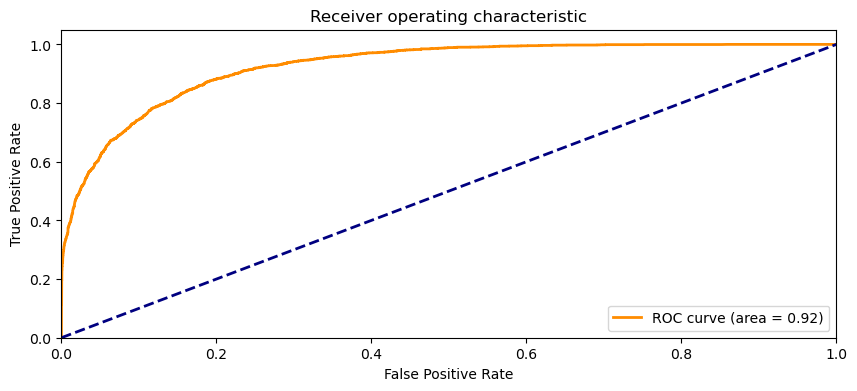

AUC: 0.9247818491485038


In [42]:
#Evaluation
from sklearn.metrics import roc_curve, auc

# Computing the ROC curve
fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba[:, 1])

# Computing the AUC
auc_value = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# AUC value
print("AUC:", auc_value)

- The curve: The orange curve represents the trade-off between the model's ability to correctly identify positive cases (true positive rate) and its tendency to incorrectly identify negative cases as positive (false positive rate) at different threshold values.
- Area Under the Curve (AUC): The AUC score is 0.92, which indicates a very good model performance. A higher AUC means better classification performance.
- Diagonal Line: The dashed line represents a random classifier, where the true positive rate and false positive rate are equal. Any model above this line is considered better than random guessing.

**In summary, the ROC curve shows that the model has a good ability to distinguish between positive and negative cases, with a high AUC score indicating excellent classification performance.**

#### 5) Model Performance Comparison with Different Metrics

In [43]:
# Define features (X) and target (y)
X = adult_df.drop('income', axis=1)
y = adult_df['income']

In [45]:
#defining Classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
classifiers = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100)
}

In [50]:
#defining evaluation matrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the evaluation metrics
metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1-score': make_scorer(f1_score),
    'ROC-AUC': make_scorer(roc_auc_score)
}

In [51]:
#performing cross validation for each classifier
from sklearn.model_selection import cross_val_score, cross_val_predict

results = {}
for clf_name, clf in classifiers.items():
    results[clf_name] = {}
    for metric_name, metric in metrics.items():
        scores = cross_val_score(clf, X, y, cv=5, scoring=metric)
        results[clf_name][metric_name] = scores.mean()

In [52]:
# results
print("Model Performance Comparison:")
for clf_name, metrics in results.items():
    print(f"{clf_name}:")
    for metric_name, score in metrics.items():
        print(f"  {metric_name}: {score:.3f}")
    print()

Model Performance Comparison:
SVM:
  Accuracy: 0.838
  Precision: 0.771
  Recall: 0.457
  F1-score: 0.574
  ROC-AUC: 0.707

Random Forest:
  Accuracy: 0.857
  Precision: 0.740
  Recall: 0.622
  F1-score: 0.673
  ROC-AUC: 0.777

Gradient Boosting:
  Accuracy: 0.867
  Precision: 0.788
  Recall: 0.606
  F1-score: 0.685
  ROC-AUC: 0.777

